# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [4]:
# The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010 corresponding to a total of 41188 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
print("\nNumber of rows, columns:")
print(df.shape)


Number of rows, columns:
(41188, 21)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
print("\nDescriptive Statistics of Numerical Variables:")
df.describe()


Descriptive Statistics of Numerical Variables:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
print("\nDescriptive Statistics of Categorical Variables:")
df.describe(include=['object', 'category'])


Descriptive Statistics of Categorical Variables:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


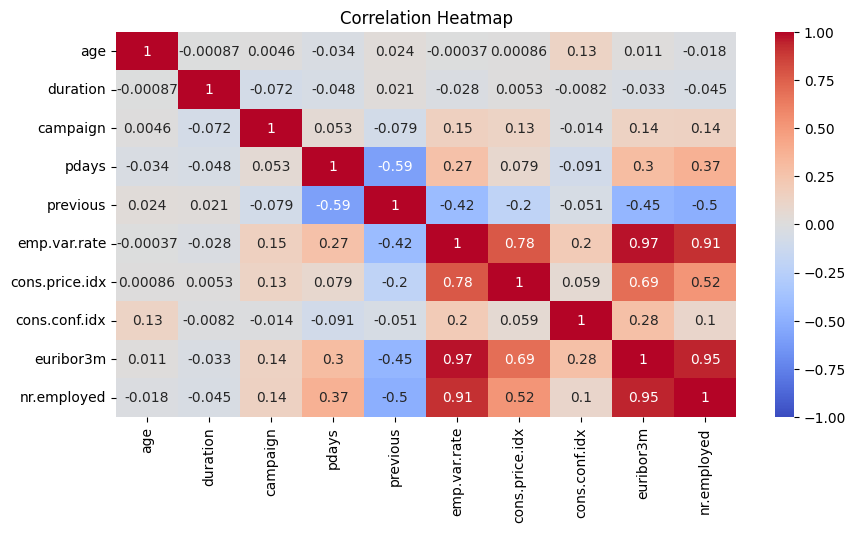

In [13]:
# Selecting numerical features only
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Heatmap on numerical features
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

<span style="color:green; font-weight:bold;"> Notes: </span>

From the correlation heatmap we can see that euribor3m, nr.employed and emp.var.rate are highly related. We will only use one of them and drop the others.

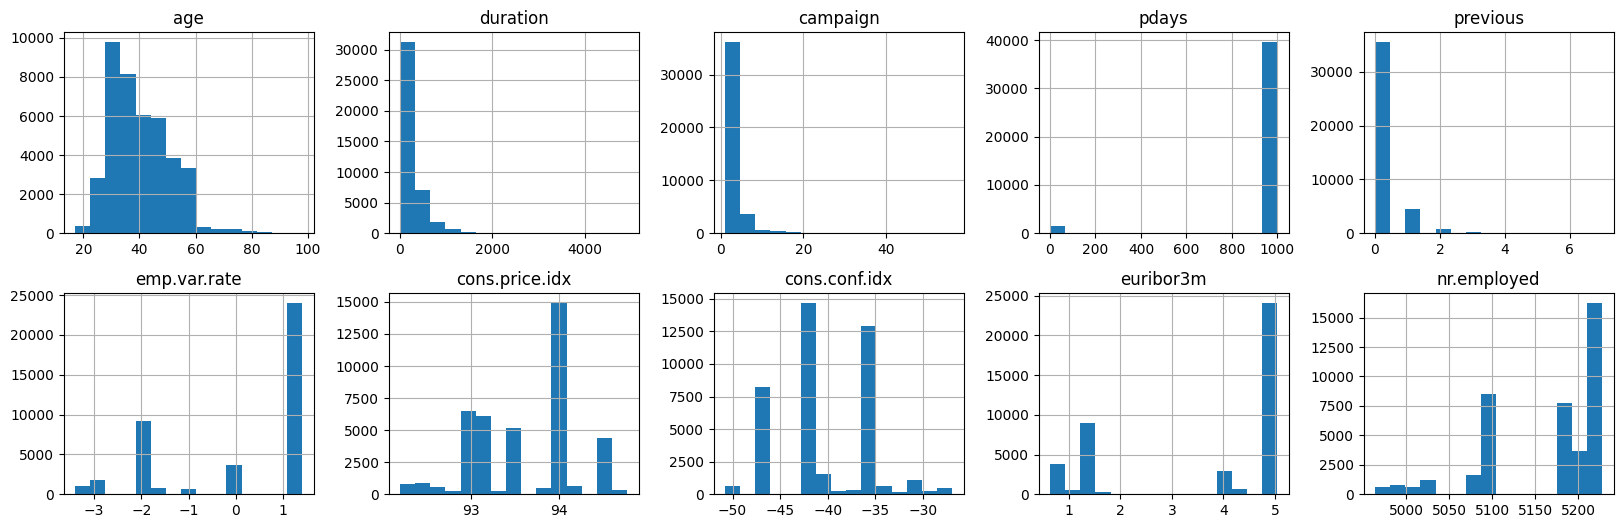

In [14]:
# Histogram for numerical variables
df_numeric.hist(bins=15, figsize=(20, 6), layout=(2, 5))
plt.show()

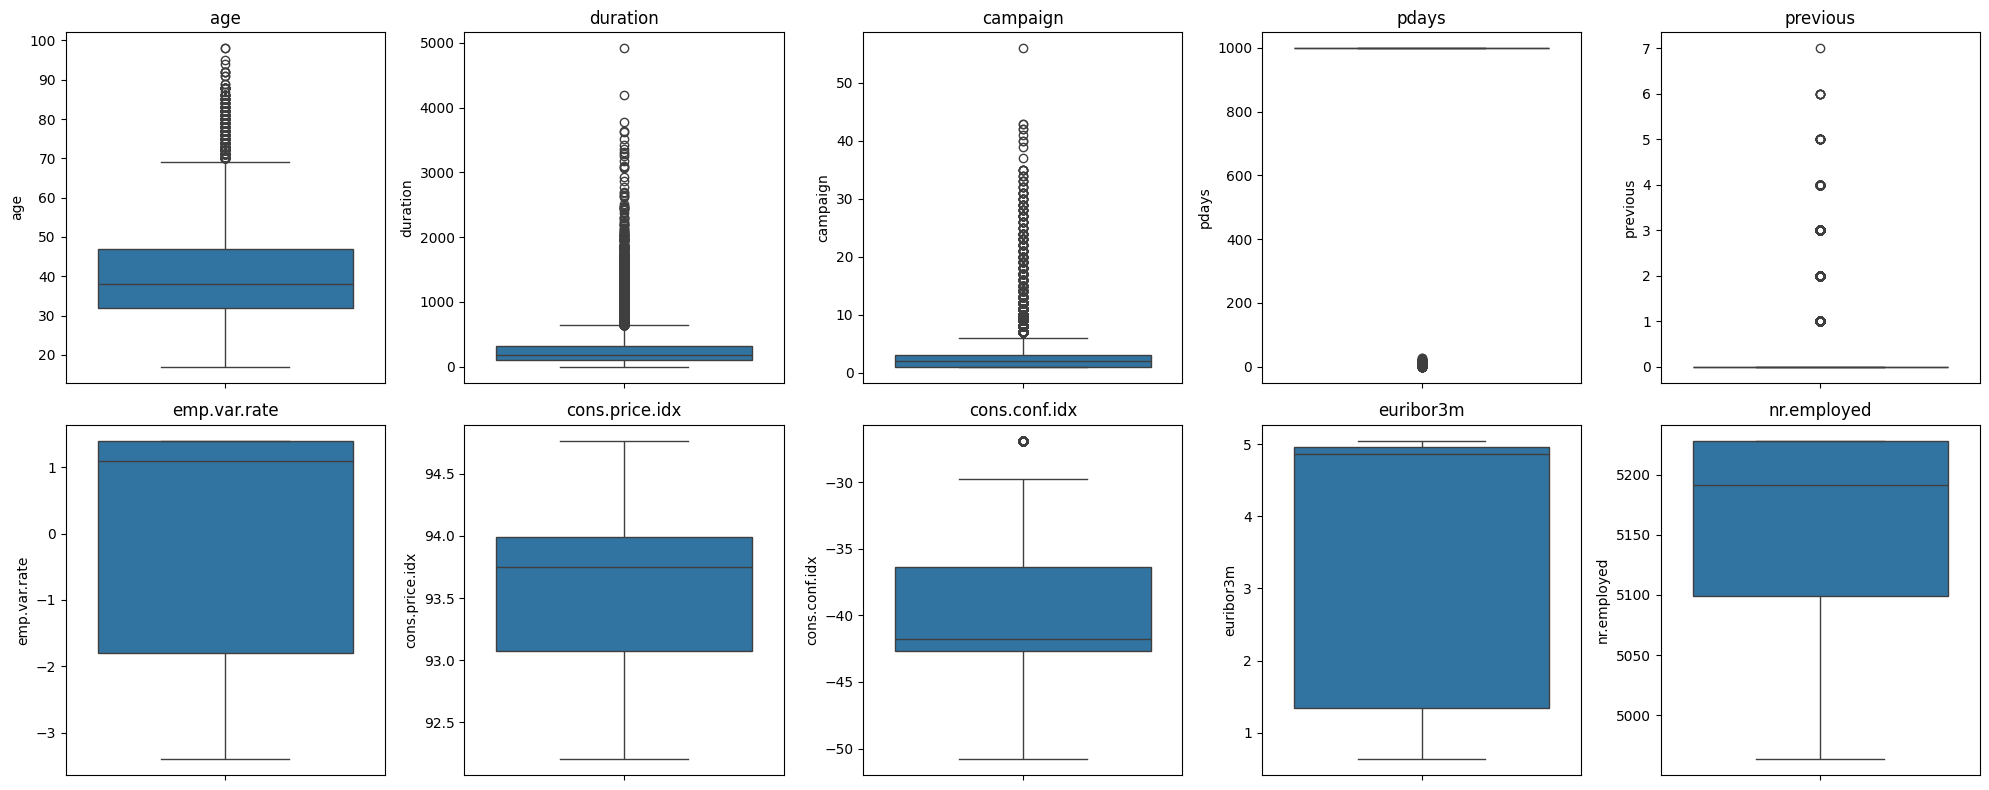

In [15]:
# Use box plots to visualize outliers in numerical features
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


<span style="color:green; font-weight:bold;"> Notes: </span>

1. pdays: Indicates the number of days that passed by after the client was last contacted from a previous campaign. A value of 999 means the client was not previously contacted. Since over 75% of the dataset has this value, we may consider dropping this column.
2. previous: Represents the number of contacts performed before this campaign and for this client. More than 75% of the data has a value of zero, suggesting this feature may not be useful, and we may consider removing it.
3. Both duration and campaign contain a significant number of outliers greater than the upper bound. We should check if these outliers correlate with specific classes in the target variable.

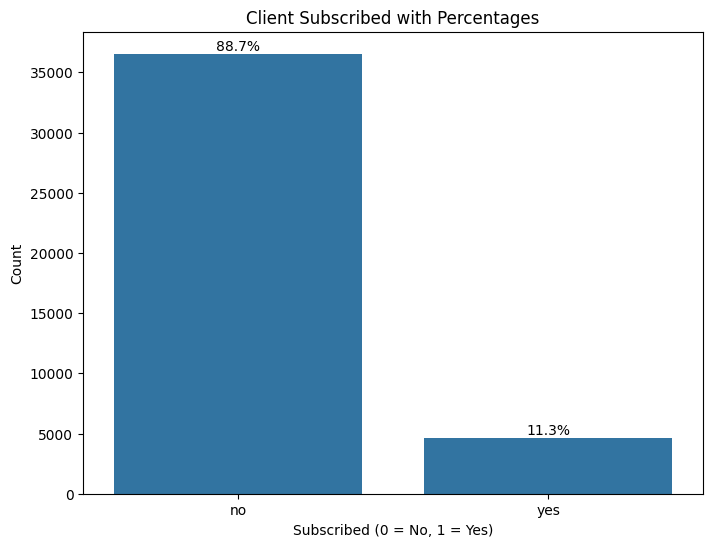

In [16]:
# Plot subscrbied with percentages on top of each bar
plt.figure(figsize=(8,6))
ax = sns.countplot(x='y', data=df)

# Calculate percentages and annotate the bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Client Subscribed with Percentages')
plt.xlabel('Subscribed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

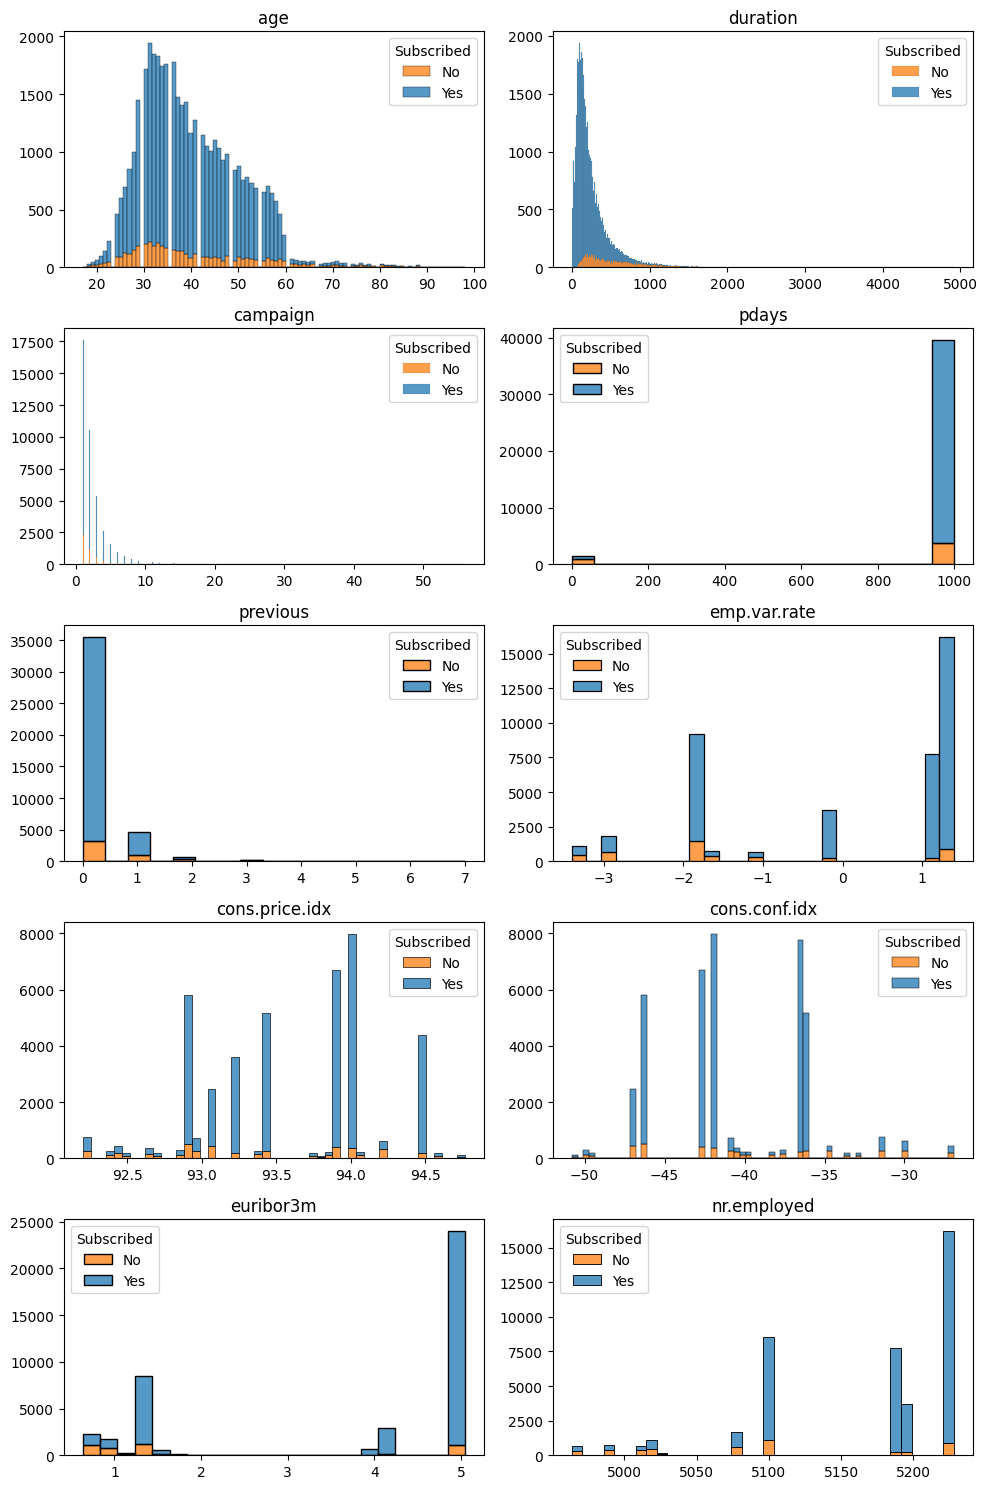

In [17]:
# Distribution of numerical features grouped by subscrbied 
fig, axes = plt.subplots(5,2, figsize=(10, 15))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(data=df, x=col, hue = 'y', ax=axes[i], multiple='stack')
    axes[i].legend(title="Subscribed", labels=["No", "Yes"])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [18]:
target_col = 'y' 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop(target_col)


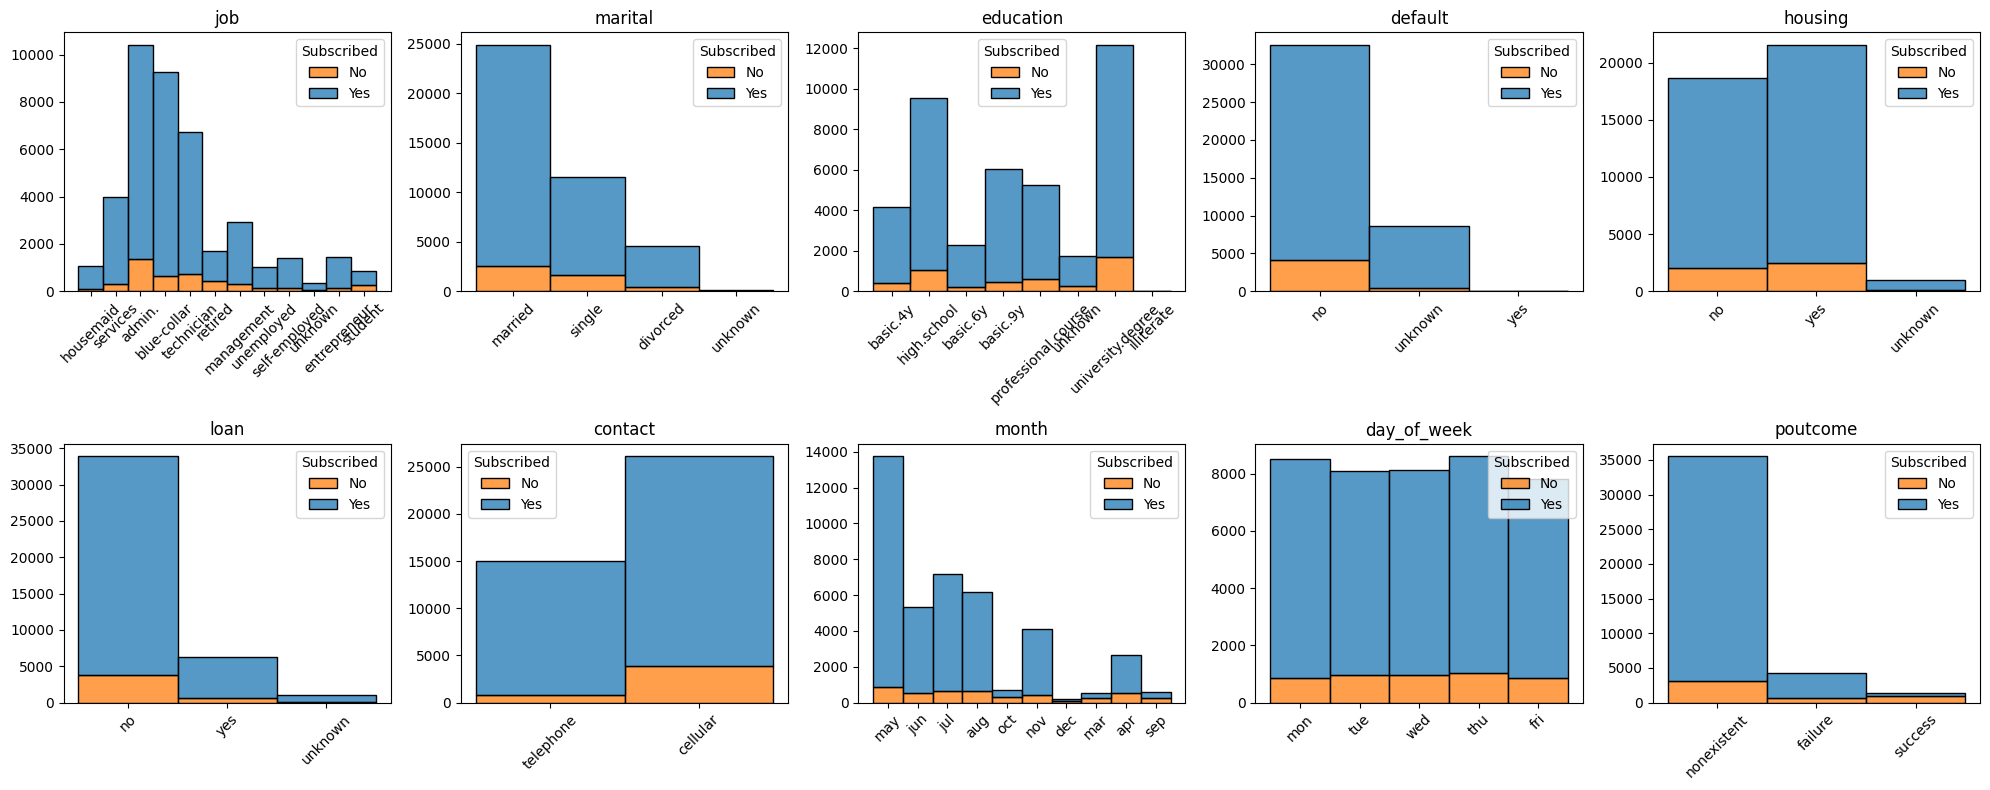

In [19]:
# Distribution of categorical features grouped by subscrbied 
fig, axes = plt.subplots(2,5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.histplot(data=df, x=col, hue = 'y', ax=axes[i], multiple='stack')
    axes[i].legend(title="Subscribed", labels=["No", "Yes"])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

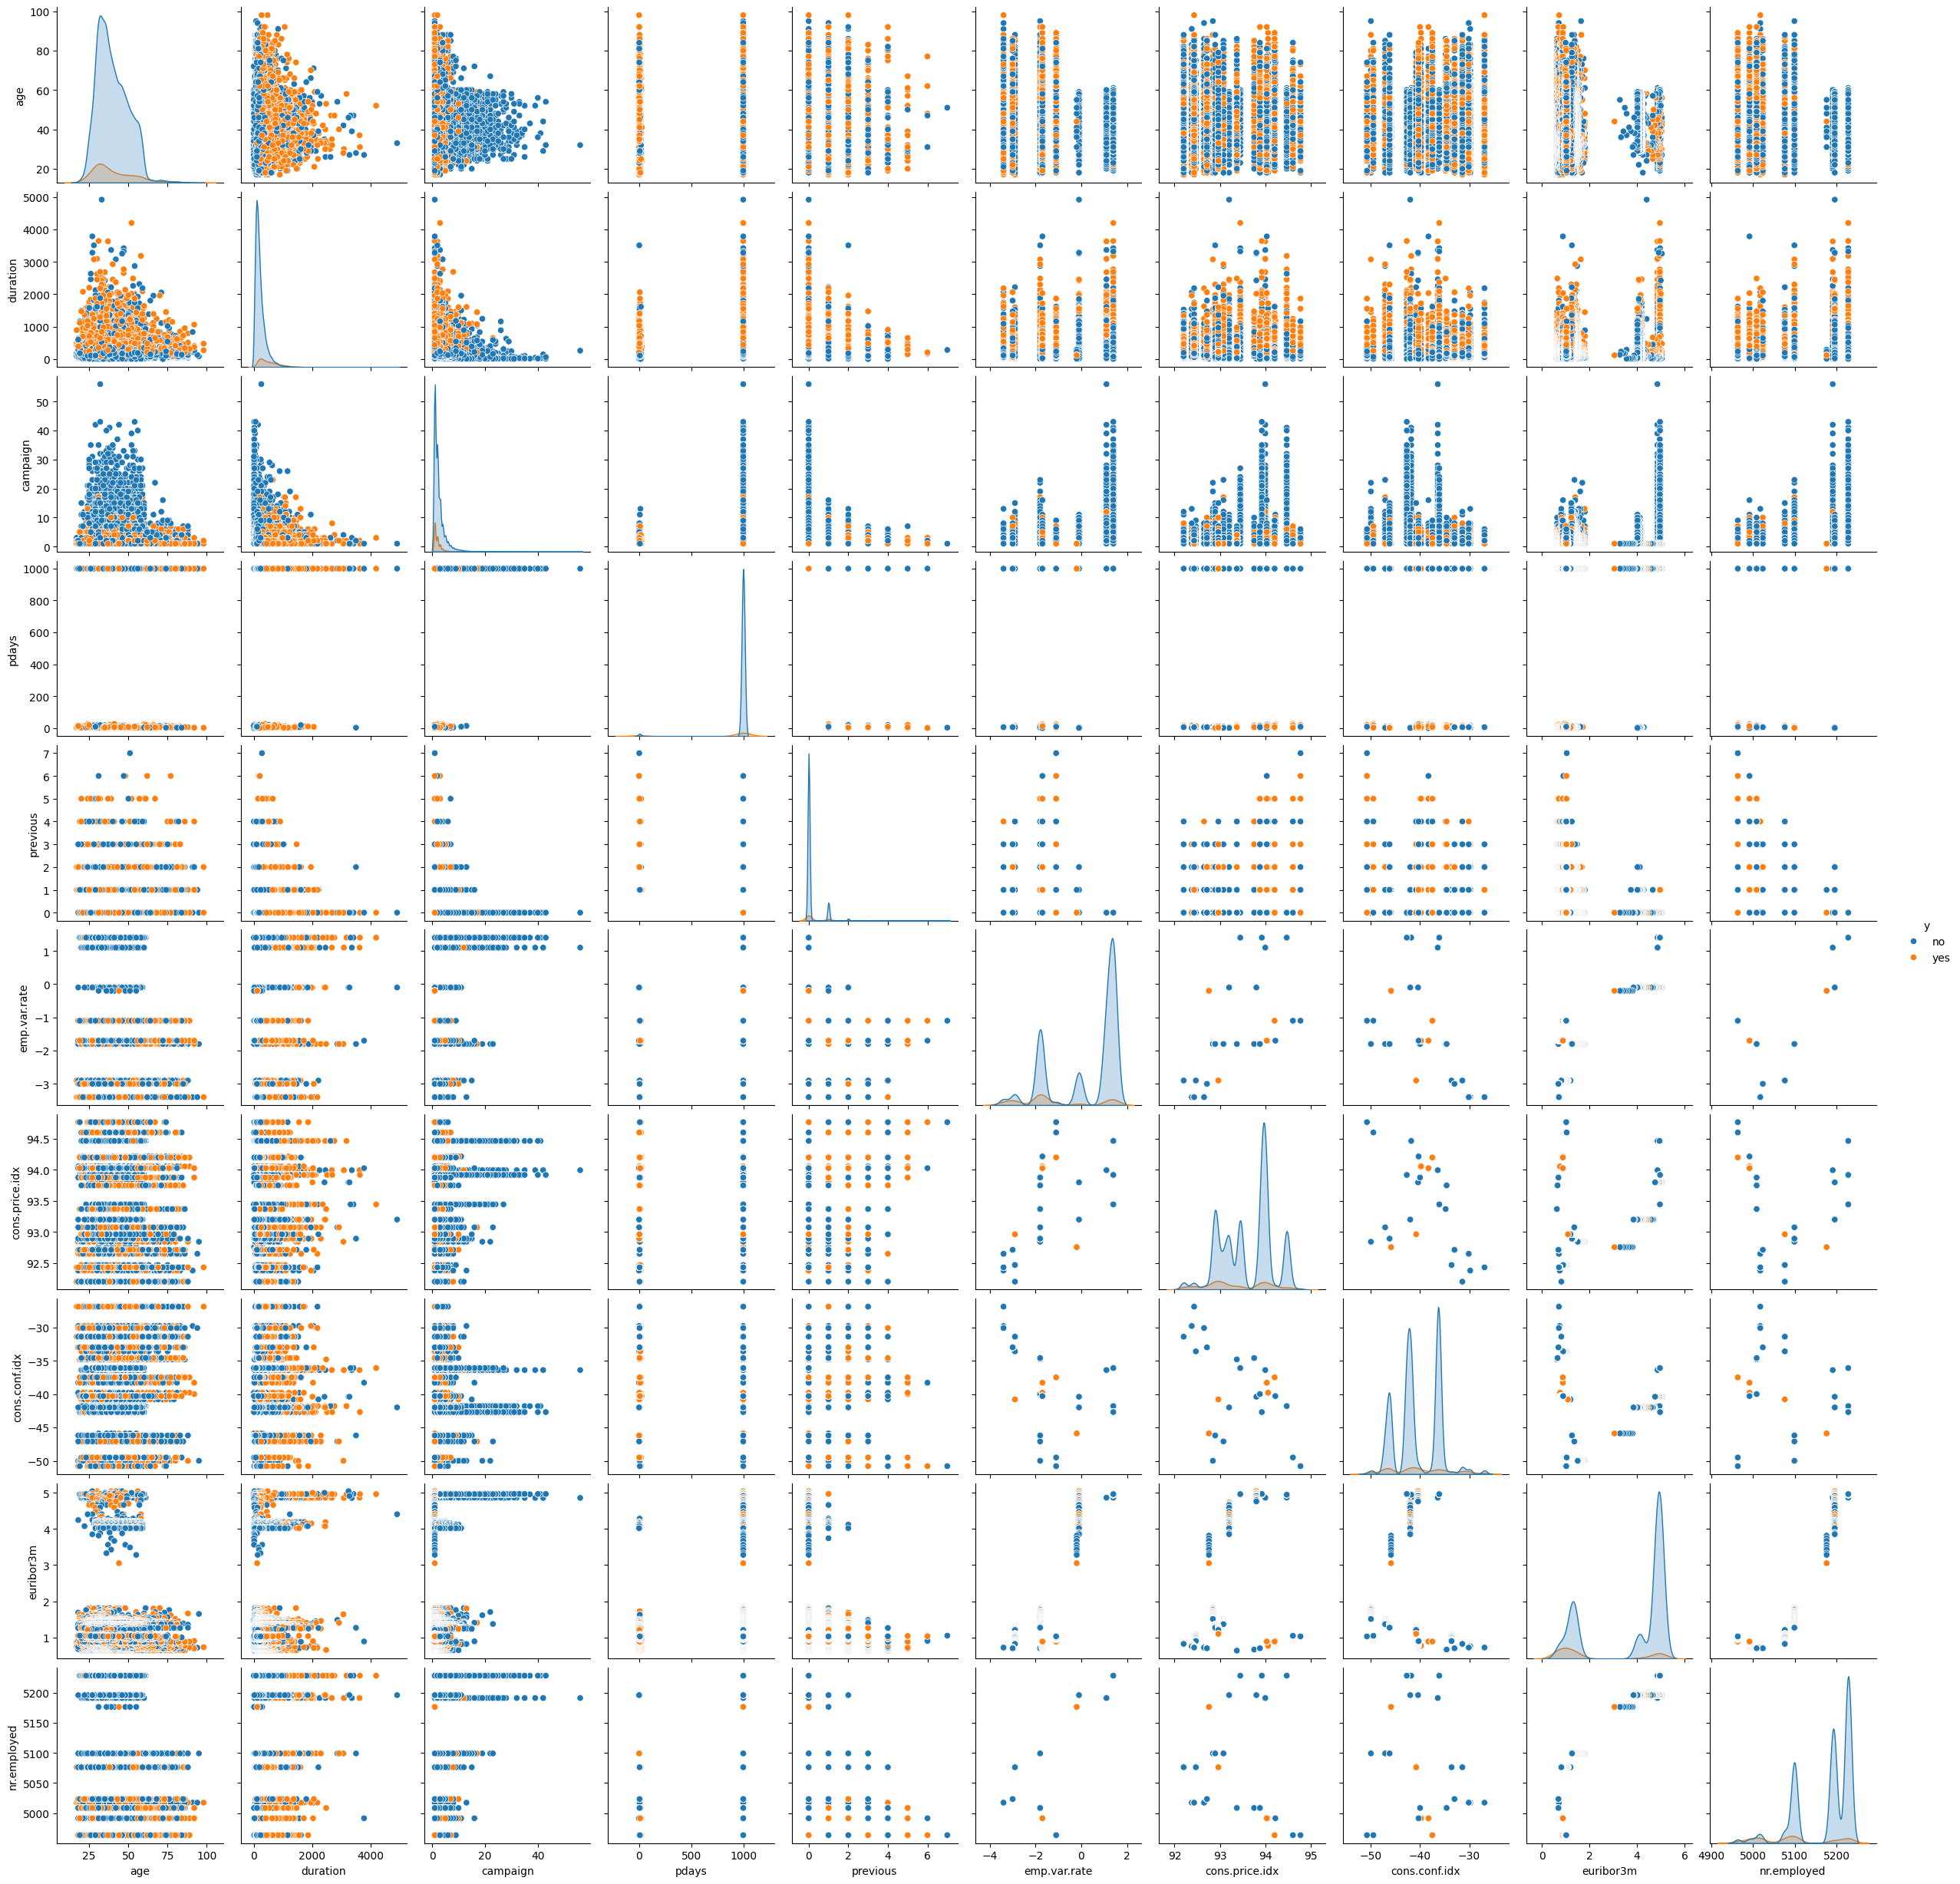

In [21]:
# Create a pairplot for all numerical variables, coloring by the 'y' variable (aka, subscribed).
sns.pairplot(df, hue = 'y')
plt.show

<span style="color:green; font-weight:bold;">Notes: </span>

1. The dataset is imbalanced, with only 11.3% of clients having subscribed to the deposit. 
2. Features such as ‘duration’ and ‘campaign’ exhibit right-skewed distributions. 
3. A longer duration is associated with a higher subscription success rate. 
4. The day of the week and the month have little impact on subscription rates.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Business Objective

The study aims to develop a predictive model to assess whether a client will subscribe a term deposit during a marketing campaign. The performance of K-Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines will be compared.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Selecting Data

In [23]:
mapping = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(mapping)
X = df.drop('y', axis=1)
y = df['y']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier



In [25]:
# Column transformer for all numerical and categorical features
transformer = make_column_transformer(
                    (OneHotEncoder(handle_unknown='ignore', drop = 'if_binary', categories = 'auto'), cat_cols),
                    (StandardScaler(), num_cols),
                    remainder='passthrough')


In [26]:
# Calculate feature importance
pipe_importance = Pipeline([('transform', transformer), ('model', DecisionTreeClassifier(max_depth=10))])

pipe_importance.fit(X, y)
perm_importance = permutation_importance(pipe_importance, X, y, n_repeats=5, random_state=42)

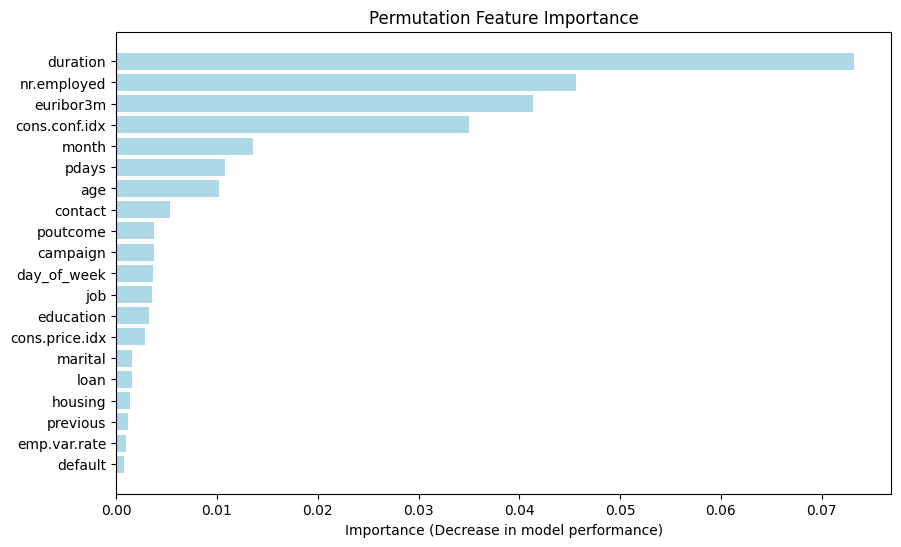

In [27]:
# Get the importance values (mean decrease in performance)
importances = perm_importance.importances_mean

# Sort features by importance
indices = importances.argsort()

# Visualize the result
plt.figure(figsize=(10, 6))
plt.title("Permutation Feature Importance")
plt.barh(X.columns[indices], importances[indices], color='lightblue')
plt.xlabel("Importance (Decrease in model performance)")
plt.show()

<span style="color:green; font-weight:bold;"> Notes: </span>

Based on the previous notes and permutation feature importance, we will drop the following columns:
1. nr.employed and emp.var.rate: There features are highly related to euribor3m.
2. pdays and previous: More than 75% of the data is irrelevant.
3. default, marital, housing: These features have low importance.


In [28]:
useless_columns = ['nr.employed', 'emp.var.rate', 'pdays', 'previous', 'default', 'marital', 'housing']
df_new = df.copy()
df_new = df_new.drop(columns=useless_columns)
df_new.head()

,age,job,education,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,basic.4y,no,telephone,may,mon,261,1,nonexistent,93.994,-36.4,4.857,0
1,57,services,high.school,no,telephone,may,mon,149,1,nonexistent,93.994,-36.4,4.857,0
2,37,services,high.school,no,telephone,may,mon,226,1,nonexistent,93.994,-36.4,4.857,0
3,40,admin.,basic.6y,no,telephone,may,mon,151,1,nonexistent,93.994,-36.4,4.857,0
4,56,services,high.school,yes,telephone,may,mon,307,1,nonexistent,93.994,-36.4,4.857,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.sparse import issparse


In [30]:
# Define the features (X) and the target variable (y)
X = df_new.drop(columns=['y'])  
y = df_new['y']  

In [31]:
# Split the dataset into training (train) and testing (test) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Check the size of the sets
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (32950, 13). Training labels size: (32950,)
Test set size: (8238, 13). Test labels size: (8238,)


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   education       41188 non-null  object 
 3   loan            41188 non-null  object 
 4   contact         41188 non-null  object 
 5   month           41188 non-null  object 
 6   day_of_week     41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  cons.price.idx  41188 non-null  float64
 11  cons.conf.idx   41188 non-null  float64
 12  euribor3m       41188 non-null  float64
 13  y               41188 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 4.4+ MB


In [34]:
# Define which columns are categorical and which are numerical
categorical_columns = ['job', 'education', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [35]:
# Create a preprocessor that applies both imputation and scaling to numerical columns and one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputation using the mean
            ('scaler', StandardScaler())  # Standardization of numerical columns
        ]), numerical_columns),  # Pipeline for numerical columns

        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encoding for categorical columns
    ])

In [36]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [37]:
# The names of the numerical columns remain unchanged after the transformation
numerical_column_names = numerical_columns

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the names of numerical and categorical columns into a single list
all_column_names = list(numerical_column_names) + list(categorical_column_names)

# If it's sparse, convert it to a dense array
if issparse(X_train_processed):
    X_train_processed = X_train_processed.toarray()

# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

X_train_processed_df.head()

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.001669,-0.631114,-0.206242,0.589080,-0.472769,0.771354,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.864095,-0.546321,0.513676,-1.180760,-1.229916,-1.372028,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.819007,-0.943306,1.233593,-1.180760,-1.229916,-1.308581,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.285806,-0.631114,0.873635,0.589080,-0.472769,0.771930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.097494,0.332441,-0.206242,0.720307,0.890097,0.713674,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# If it's sparse, convert it to a dense array
if issparse(X_test_processed):
    X_test_processed = X_test_processed.toarray()
    
# Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

X_test_processed_df.head()

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.627357,0.436505,-0.566200,-1.180760,-1.229916,-1.340304,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.435707,0.105042,-0.206242,0.720307,0.890097,0.713674,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.672445,-0.792991,-0.566200,-1.180760,-1.229916,-1.332229,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.384970,0.374837,0.513676,1.533570,-0.278074,0.775391,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.247395,-0.264963,-0.206242,0.589080,-0.472769,0.773084,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Balancing the Dataset

In [39]:
from imblearn.over_sampling import SMOTE # pip install imbalanced-learn
from collections import Counter

In [40]:
# Print the class distribution before balancing
print("Class distribution before SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({0: 29245, 1: 3705})


In [41]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed_df, y_train)

In [42]:
# Print the class distribution after balancing
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution after SMOTE: Counter({0: 29245, 1: 29245})


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Baseline accuracy: 0.49
Baseline precision: 0.11
Baseline recall: 0.48
Baseline F1: 0.18


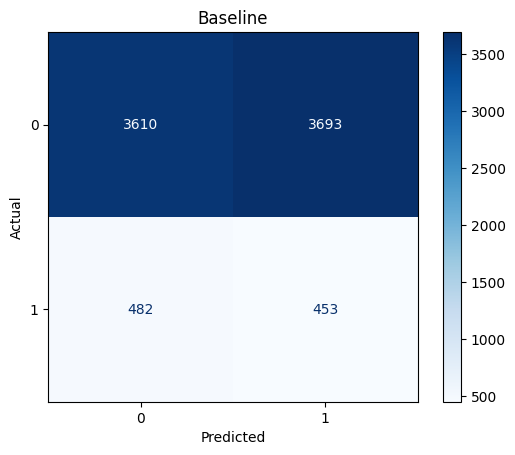

In [44]:
random_baseline = DummyClassifier(strategy="stratified")  
random_baseline.fit(X_train_balanced, y_train_balanced)
y_random_pred = random_baseline.predict(X_test_processed_df)

baseline_accuracy = accuracy_score(y_test, y_random_pred)
baseline_precision = precision_score(y_test, y_random_pred, average='binary', zero_division=0)
baseline_recall = recall_score(y_test, y_random_pred, average='binary', zero_division=0)
baseline_f1 = f1_score(y_test, y_random_pred, average='binary', zero_division=0)
cm = confusion_matrix(y_test, y_random_pred)

print(f"Baseline accuracy: {baseline_accuracy:.2f}")
print(f"Baseline precision: {baseline_precision:.2f}")
print(f"Baseline recall: {baseline_recall:.2f}")
print(f"Baseline F1: {baseline_f1:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [46]:
# Basic Logistic Regression model
model = LogisticRegression()

# Create a dictionary to store metrics
results = {}

# Perform cross-validation on the training set
cv_scores = cross_val_score(
    model,
    X_train_balanced,
    y_train_balanced,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available processors for faster computation
)

# Train the model on the full training set
model.fit(X_train_balanced, y_train_balanced)

# Store the results in the dictionary
results['Logistic Regression'] = {
    'Cross-Validation Accuracy (mean)': cv_scores.mean(),
    'Cross-Validation Accuracy (std)': cv_scores.std(),
}

# Display the results
results_df = pd.DataFrame(results).T
results_df

,Cross-Validation Accuracy (mean),Cross-Validation Accuracy (std)
Logistic Regression,0.879022,0.002929


### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
# Create a dictionary to store metrics
results = {}

# Predict on the test set
y_pred = model.predict(X_test_processed_df)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Store the results in the dictionary
results['Logistic Regression'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Confusion Matrix': confusion_mat
}

                     Accuracy Precision   Recall  F1-Score
Logistic Regression  0.862588   0.44579  0.86631  0.588663


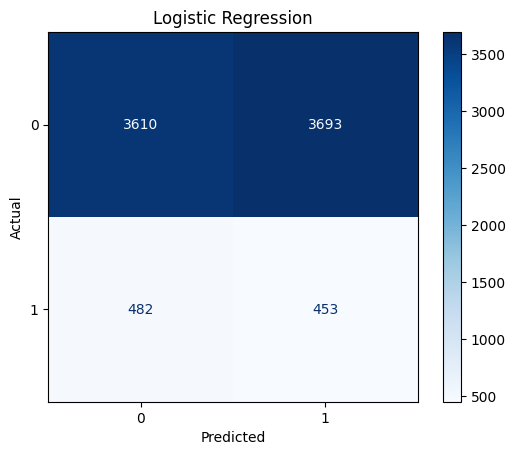

In [48]:
# Display metrics
metrics_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')
print(metrics_df)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import math
import time

In [50]:
# Create a list of models to train
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),  
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
}

In [51]:
# Create a dictionary to store metrics
results = {}

# Train each model with cross-validation
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train_balanced,
        y_train_balanced,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    # Fit the model and time it
    start_time = time.time()
    model.fit(X_train_balanced, y_train_balanced)
    fit_time = time.time() - start_time

    # Predict on training and testing data
    train_pred = model.predict(X_train_processed_df)
    y_pred = model.predict(X_test_processed_df)

    # Calcuate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store the results in the dictionary
    results[model_name] = {
        'Train Time': fit_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F1-Score': f1,
        'Confusion Matrix': confusion_mat
    }

Training and evaluating KNN with cross-validation...
Training and evaluating Logistic Regression with cross-validation...
Training and evaluating Decision Tree with cross-validation...
Training and evaluating SVM with cross-validation...


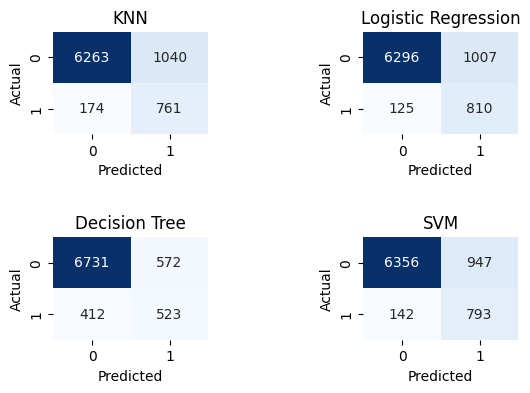

In [52]:
# Calculate rows and columns for the plot grid
n_models = len(results)
n_cols = 2  # Maximum number of plots per row
n_rows = math.ceil(n_models / n_cols)  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2))  # Smaller figure size

# Flatten axes for easy iteration (works for multi-row layouts)
axes = axes.flatten()

# Plot each confusion matrix
for idx, (model_name, metrics) in enumerate(results.items()):
    confusion_mat = metrics['Confusion Matrix']
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide any unused subplots
for idx in range(len(results), len(axes)):
    axes[idx].axis('off')

# Add vertical space between rows
plt.subplots_adjust(hspace=1)  # Increase vertical spacing
plt.subplots_adjust(wspace=1)  # Add optional horizontal spacing

plt.show()

In [53]:
# Create a DataFrame for metrics and sort by F1-Score
metrics_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')

# Sort by F1-Score
metrics_df = metrics_df.sort_values(['Test F1-Score'], ascending=False)

metrics_df

,Train Time,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-Score
SVM,24.705187,0.892595,0.867808,0.455747,0.848128,0.592897
Logistic Regression,0.106389,0.864765,0.862588,0.44579,0.86631,0.588663
KNN,0.034229,0.903065,0.852634,0.422543,0.813904,0.556287
Decision Tree,0.506023,1.0,0.880554,0.477626,0.559358,0.515271


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [54]:
from sklearn.model_selection import GridSearchCV


In [55]:
# Hyperparameter grid for each model
# SVM has a long runtime, so we’ll use a smaller dataset for it.
param_grid = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    # 'SVM': { 
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    #     'gamma': ['scale', 'auto']
    # }
}

In [56]:
# Initialize the best models dictionary
best_models = {}

# Perform grid search for each model
for model_name, params in param_grid.items():
    print(f"Tuning {model_name}...")
    if model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'Logistic Regression':
        model = LogisticRegression()
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_name == 'SVM':
        model = SVC(random_state=42)

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='accuracy',
        cv=5,
        verbose=1
    )

    # Fit the grid search and time it
    start_time = time.time()
    grid_search.fit(X_train_balanced, y_train_balanced)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy score for {model_name}: {grid_search.best_score_}")
    print(f"Traning time for {model_name}: {fit_time}\n")

Tuning KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy score for KNN: 0.9517353393742521
Traning time for KNN: 5.665464957555135

Tuning Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 1}
Best accuracy score for Logistic Regression: 0.8790220550521457
Traning time for Logistic Regression: 0.3885159969329834

Tuning Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}
Best accuracy score for Decision Tree: 0.9267909044281073
Traning time for Decision Tree: 1.0949384570121765



In [57]:
# Evaluate the best models on the test set
results_tuned = {}

for model_name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_processed_df)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store the results
    results_tuned[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_mat
    }



### Tuning SVM with smaller dataset

In [58]:
df_small = pd.read_csv('data/bank-additional.csv', sep = ';')

In [59]:
df_small.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [60]:
print("\nNumber of rows, columns:")
print(df_small.shape)


Number of rows, columns:
(4119, 21)


In [61]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [62]:
df_small.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [63]:
print("\nDescriptive Statistics of Numerical Variables:")
df_small.describe()


Descriptive Statistics of Numerical Variables:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [64]:
print("\nDescriptive Statistics of Categorical Variables:")
df_small.describe(include=['object', 'category'])


Descriptive Statistics of Categorical Variables:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [65]:
mapping = {'yes': 1, 'no': 0}
df_small['y'] = df_small['y'].map(mapping)

In [66]:
useless_columns = ['nr.employed', 'emp.var.rate', 'pdays', 'previous', 'default', 'marital', 'housing']
df_small = df_small.drop(columns=useless_columns)
df_small.head()

,age,job,education,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,blue-collar,basic.9y,no,cellular,may,fri,487,2,nonexistent,92.893,-46.2,1.313,0
1,39,services,high.school,no,telephone,may,fri,346,4,nonexistent,93.994,-36.4,4.855,0
2,25,services,high.school,no,telephone,jun,wed,227,1,nonexistent,94.465,-41.8,4.962,0
3,38,services,basic.9y,unknown,telephone,jun,fri,17,3,nonexistent,94.465,-41.8,4.959,0
4,47,admin.,university.degree,no,cellular,nov,mon,58,1,nonexistent,93.200,-42.0,4.191,0


In [67]:
X_s = df_small.drop(columns=['y'])  
y_s = df_small['y'] 

In [68]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)


In [69]:
# Check the size of the sets
print(f"Training set size: {X_s_train.shape}. Training labels size: {y_s_train.shape}")
print(f"Test set size: {X_s_test.shape}. Test labels size: {y_s_test.shape}")

Training set size: (3295, 13). Training labels size: (3295,)
Test set size: (824, 13). Test labels size: (824,)


In [70]:
X_s_train_processed = preprocessor.fit_transform(X_s_train)
X_s_test_processed = preprocessor.transform(X_s_test)

In [71]:
# If it's sparse, convert it to a dense array
if issparse(X_s_train_processed):
    X_s_train_processed = X_s_train_processed.toarray()

# Convert the matrix into a DataFrame with the column names
X_s_train_processed_df = pd.DataFrame(X_s_train_processed, columns=all_column_names)

X_s_train_processed_df.head()

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.684963,-0.080048,-0.612111,0.721148,0.876768,0.714549,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.684963,-0.634848,-0.612111,0.721148,0.876768,0.715125,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.155945,1.533201,-0.207921,0.721148,0.876768,0.715125,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.781853,0.431470,-0.612111,-1.169946,-1.240391,-1.344595,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.103624,-0.335807,-0.207921,0.721148,0.876768,0.713973,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# If it's sparse, convert it to a dense array
if issparse(X_s_test_processed):
    X_s_test_processed = X_s_test_processed.toarray()
    
# Convert the matrix into a DataFrame with the column names
X_s_test_processed_df = pd.DataFrame(X_s_test_processed, columns=all_column_names)

X_s_test_processed_df.head()

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.768385,1.143660,-0.612111,0.777829,0.466298,-1.561741,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.491183,-0.611240,-0.612111,1.530144,-0.289830,0.773300,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.543504,-0.162678,-0.612111,-0.642638,-0.333037,0.265282,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.072522,-0.024962,-0.207921,-1.049713,-0.073793,-1.356690,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2.124844,-0.355481,-0.207921,-1.255826,-2.061330,-1.206935,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
print("Class distribution before SMOTE:", Counter(y_s_train))

# Apply SMOTE to balance the dataset
X_s_train_balanced, y_s_train_balanced = smote.fit_resample(X_s_train_processed_df, y_s_train)

print("Class distribution after SMOTE:", Counter(y_s_train_balanced))

Class distribution before SMOTE: Counter({0: 2936, 1: 359})
Class distribution after SMOTE: Counter({0: 2936, 1: 2936})


In [74]:
# The smaller dataset is now prepared and ready for SVM tuning

# Hyperparameter grid for SVM
SVM_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=SVM_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit the grid search and time it
start_time = time.time()
grid_search.fit(X_s_train_balanced, y_s_train_balanced)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Store the best model
SVM_best_model = grid_search.best_estimator_
print(f"Best parameters for SVM: {grid_search.best_params_}")
print(f"Best accuracy score for SVM: {grid_search.best_score_}")
print(f"Traning time for SVM: {fit_time}\n")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score for SVM: 0.9625340534270904
Traning time for SVM: 1.4886752367019653



In [75]:
# Evaluate the SVM best model on the test set

# Predict on the test set
y_s_pred = SVM_best_model.predict(X_s_test_processed_df)

# Calculate metrics
accuracy = accuracy_score(y_s_test, y_s_pred)
precision = precision_score(y_s_test, y_s_pred)
recall = recall_score(y_s_test, y_s_pred)
f1 = f1_score(y_s_test, y_s_pred)
confusion_mat = confusion_matrix(y_s_test, y_s_pred)

# Store the results
SVM_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Confusion Matrix': confusion_mat
}


In [76]:
# Add the SVM metrics to the tuned results
results_tuned['SVM'] = SVM_metrics


Tuned Model Metrics:
                     Accuracy Precision    Recall  F1-Score
SVM                  0.896845  0.539326  0.521739  0.530387
Decision Tree        0.882617  0.487823  0.685561  0.570031
KNN                  0.879704  0.476431  0.605348  0.533208
Logistic Regression  0.862588   0.44579   0.86631  0.588663


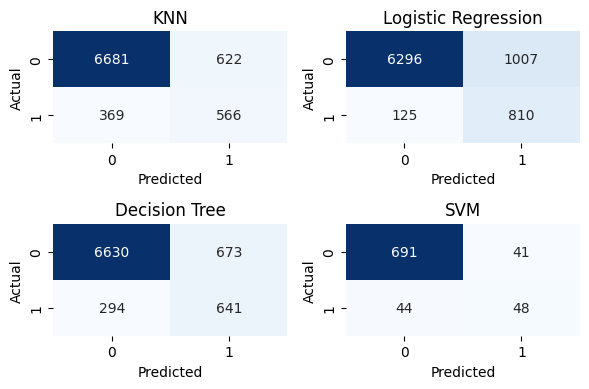

In [77]:
# Display the tuned results
metrics_df_tuned = pd.DataFrame(results_tuned).T.drop(columns='Confusion Matrix')
metrics_df_tuned = metrics_df_tuned.sort_values(['Accuracy'], ascending=False)

print("\nTuned Model Metrics:")
print(metrics_df_tuned)

# Plot confusion matrices for the tuned models
fig, axes = plt.subplots(math.ceil(len(results_tuned) / 2), 2, figsize=(6, 4))
axes = axes.flatten()

for idx, (model_name, metrics) in enumerate(results_tuned.items()):
    confusion_mat = metrics['Confusion Matrix']
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide unused axes
for idx in range(len(results_tuned), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Interpreting the model

In [81]:
! pip install shap


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [78]:
import shap

In [79]:
# Take a random sample of 50 background samples
background = shap.sample(X_train_balanced, 50)

# Create a SHAP explainer for the SVM model
explainer = shap.KernelExplainer(models['Decision Tree'].predict, background)

# Calculate the SHAP values for the test samples
shap_values = explainer.shap_values(X_test_processed)

100%|██████████| 8238/8238 [04:11<00:00, 32.78it/s]


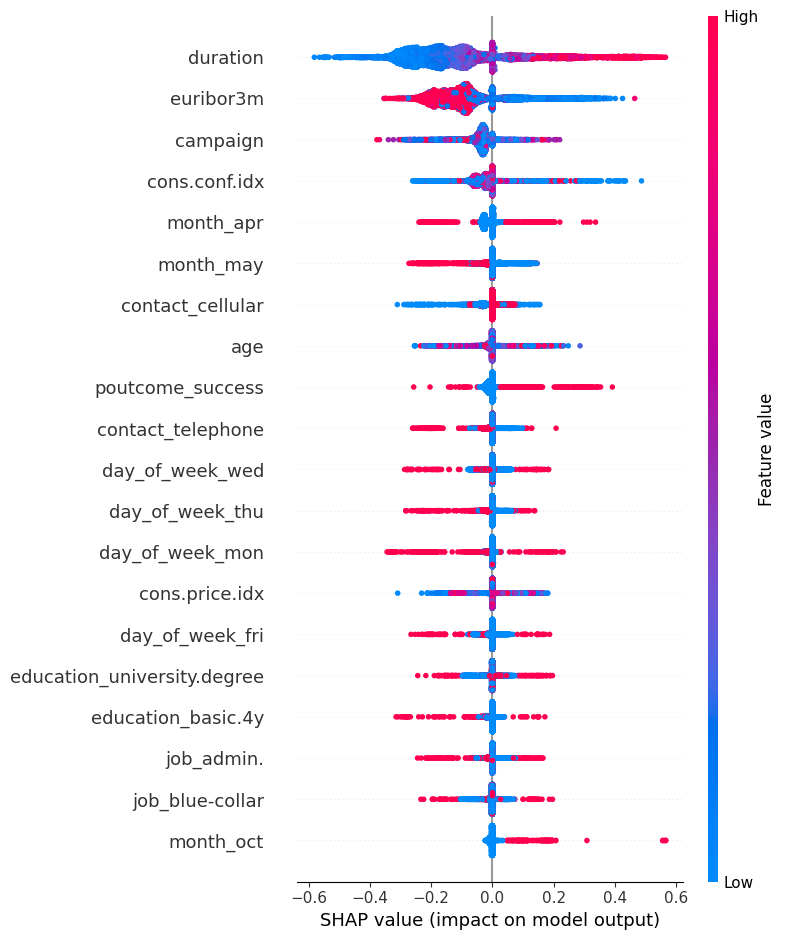

In [80]:
# Visualize SHAP values
shap.summary_plot(shap_values, X_test_processed, feature_names=all_column_names)

The colors represent the feature's value.
- Red indicates a high value of the feature.
- Blue indicates a low value of the feature.

For duration, this means:
- Higher durations (red) push the prediction toward subscription (positive impact).
- Lower durations (blue) push the prediction away from subscription (negative impact).

This suggests that longer call durations are associated with a higher likelihood of the client subscribing, which aligns with the intuition that more engagement leads to better conversion.

For euribor3m, this means:
- High euribor3m values (red) push the prediction away from subscription (negative impact).
- Low euribor3m values (blue) have a strong impact on predicting subscription (positive impact).

This likely reflects that lower euribor rates might make deposits more attractive to clients.

##### Questions